# 1. Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import ceil
from sklearn.impute import KNNImputer

# 2. Import data

In [2]:
df = pd.read_csv(r"C:\Users\Casa-PC\Desktop\train_data.csv", low_memory=False)

# 3. Explore the data

In [3]:
df.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

####  COVID-19 Indicator,  Agreement Reached and Attorney/Representative should be a bool and not an object.

In [5]:
df['Attorney/Representative'].value_counts()
df['Attorney/Representative'] = df['Attorney/Representative'].replace({'Y': True, 'N': False})
df['Attorney/Representative'] = df['Attorney/Representative'].astype(bool)

In [6]:
df['COVID-19 Indicator'].value_counts()
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].replace({'Y': True, 'N': False})
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].astype(bool)

In [7]:
df['Agreement Reached'].value_counts()
df['Agreement Reached'] = df['Agreement Reached'].replace({'1': True, '0': False})
df['Agreement Reached'] = df['Agreement Reached'].astype(bool)

#### Accident Date is not an object. Should be in format DateTime.

In [8]:
# Convert the 'Accident Date' column to datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], errors='coerce')
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], errors='coerce')
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], errors='coerce')


## Alternative Dispute Resolutio,Carrier Type,Gender and WCB Decision should be a category and not an *object*

In [9]:
df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].astype('category')
df['Carrier Type'] = df['Carrier Type'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Accident Date                       570337 non-null  datetime64[ns]
 1   Age at Injury                       574026 non-null  float64       
 2   Alternative Dispute Resolution      574026 non-null  category      
 3   Assembly Date                       593471 non-null  datetime64[ns]
 4   Attorney/Representative             593471 non-null  bool          
 5   Average Weekly Wage                 545375 non-null  float64       
 6   Birth Year                          544948 non-null  float64       
 7   C-2 Date                            559466 non-null  datetime64[ns]
 8   C-3 Date                            187245 non-null  datetime64[ns]
 9   Carrier Name                        574026 non-null  object        
 10  Carrier 

## key statistics of numerical and categorical columns

In [11]:
df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,6.000000


#### Additional Notes:

- The minimum age recorded is 0, which doesn't make sense as it indicates an impossible age for a worker. These values might represent missing (NaN) data or data entry errors.
- The maximum age recorded is 117, which is highly unusual and likely an outlier. It should be investigated to determine if these values are real or errors.
- The minimum weekly wage recorded is 0, which may indicate missing values, errors, or individuals with no wage information. These values need to be filtered or imputed depending on the context.
- The maximum weekly wage recorded is 2,828,079, which seems to be an extreme outlier. Such high values could be data entry errors and should be investigated further.
- The minimum birth year is 0, which is clearly a data entry error, as no worker could be born in year 0.
- The maximum birth year is 2018, indicating that very recently born individuals are being recorded as workers, which is impossible. These values are likely errors and should be corrected.
- The maximum values in several columns, such as Age at Injury, Average Weekly Wage, and Birth Year, are highly unusual and likely represent outliers or data errors. A data cleaning strategy should be implemented to either remove or correct these values.

In [12]:
df.describe(include=['object'])

,Carrier Name,Claim Injury Type,County of Injury,District Name,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,574026,574026,574026,574026,564068,574026,558386,558369,556944,545389,574026
unique,2046,8,63,8,20,5,74,56,54,8286,1
top,STATE INSURANCE FUND,2. NON-COMP,SUFFOLK,NYC,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,111144,291078,60430,270779,114339,265981,46610,153373,51862,3398,574026


## Checking for duplicated lines

In [13]:
# Check for duplicates and return a boolean value
has_duplicates = df.duplicated().any()
print(f"Existence of duplicates: {has_duplicates}")

Existence of duplicates: False


### Number of People Injured by Gender

In [14]:
# Count the frequency of each gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)


M    335218
F    234051
U      4711
X        46
Name: Gender, dtype: int64


### Number of People Injured by Age and Gender

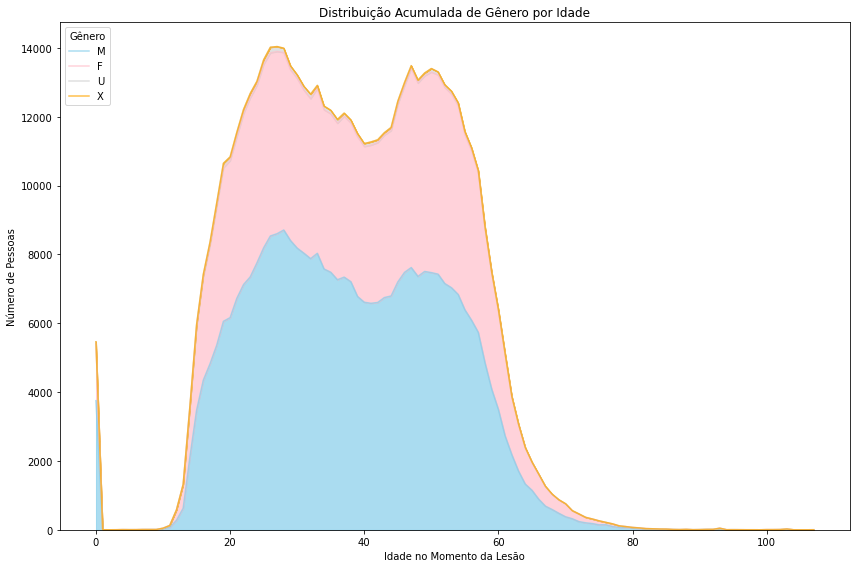

In [15]:
# Filtering and removing NaN values
df_filtered = df[['Age at Injury', 'Gender', 'Claim Injury Type', 'County of Injury']].dropna()

# Counting the frequency of each age and sorting in ascending order
age_distribution = df_filtered['Age at Injury'].value_counts().sort_index()

# Creating a DataFrame with 'Age at Injury' and 'Total Number of People'
age_distribution_df = pd.DataFrame({'Age at Injury': age_distribution.index,'Total Number of People': age_distribution.values})

# Adding gender distribution
gender_distribution = df_filtered.groupby(['Age at Injury', 'Gender']).size().unstack(fill_value=0)

# Merging the distributions into a single DataFrame
final_df = age_distribution_df.merge(gender_distribution, on='Age at Injury', how='left')

# Setting pandas options to display the entire DataFrame
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-adjust width

# Displaying the final DataFrame
# Gráfico de área empilhada
final_df[['M', 'F', 'U', 'X']].plot(
    kind='area',
    stacked=True,
    figsize=(12, 8),
    color=['skyblue', 'pink', 'lightgray', 'orange'],  # As cores definidas para cada gênero
    alpha=0.7
)

plt.title('Distribuição Acumulada de Gênero por Idade')
plt.xlabel('Idade no Momento da Lesão')
plt.ylabel('Número de Pessoas')

# Corrigindo a legenda para corresponder às cores do gráfico
plt.legend(title='Gênero', labels=['M', 'F', 'U', 'X'], loc='upper left')  # Usar as letras originais
plt.tight_layout()
plt.show()


In [16]:
# Finding the maximum number of people injured and the corresponding age
max_people = final_df['Total Number of People'].max()
max_age = final_df.loc[final_df['Total Number of People'] == max_people, 'Age at Injury'].values[0]

# Finding the minimum number of people injured and the corresponding age
min_people = final_df['Total Number of People'].min()
min_age = final_df.loc[final_df['Total Number of People'] == min_people, 'Age at Injury'].values[0]

# Displaying the results
print(f'Maximum number of people injured by age: {max_people} at age: {max_age}')
print(f'Minimum number of people injured by age: {min_people} at age: {min_age}')

Maximum number of people injured by age: 14041 at age: 31.0
Minimum number of people injured by age: 1 at age: 5.0


### Number of People Injured by Carrier Type

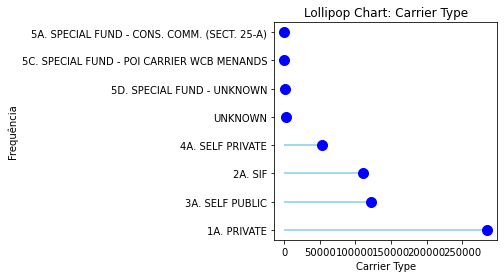

,Carrier Type,Number of People Injured
0,1A. PRIVATE,285368
1,3A. SELF PUBLIC,121920
2,2A. SIF,111144
3,4A. SELF PRIVATE,52788
4,UNKNOWN,1774
5,5D. SPECIAL FUND - UNKNOWN,1023
6,5C. SPECIAL FUND - POI CARRIER WCB MENANDS,5
7,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),4


In [17]:
def plot_lollipop(df, column):
    # Contar a frequência de cada categoria na coluna especificada
    categoria_counts = df[column].value_counts()

    # Criar o gráfico lollipop automaticamente
    plt.figure(figsize=(4, 4))
    plt.hlines(y=categoria_counts.index, xmin=0, xmax=categoria_counts.values, color='skyblue')
    plt.scatter(categoria_counts.values, categoria_counts.index, color='blue', s=100, zorder=2)

    # Adicionar título e rótulos automaticamente
    plt.title(f'Lollipop Chart: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequência')

    # Mostrar o gráfico
    plt.show()
plot_lollipop(df,'Carrier Type')
# Counting the number of injuries by carrier type while removing NaN values
carrier_distribution = df['Carrier Type'].value_counts()

# Creating a DataFrame for visualization
carrier_distribution_df = pd.DataFrame({'Carrier Type': carrier_distribution.index,'Number of People Injured': carrier_distribution.values})

# Display the carrier distribution DataFrame
carrier_distribution_df

### Number of accidents per year

In [18]:
df['Accident Year'] = df['Accident Date'].dt.year

accidents_per_year = df.groupby('Accident Year').size()
accidents_per_year

Accident Year
1961.0         1
1963.0         1
1966.0         2
1967.0         3
1969.0         2
1970.0         1
1971.0         3
1972.0         4
1973.0         7
1974.0         5
1975.0         8
1976.0         3
1977.0         8
1978.0         7
1979.0         4
1980.0        12
1981.0        10
1982.0        10
1983.0        10
1984.0        12
1985.0        10
1986.0         7
1987.0        25
1988.0        46
1989.0        35
1990.0        49
1991.0        46
1992.0        59
1993.0        44
1994.0        65
1995.0        77
1996.0       100
1997.0       112
1998.0       111
1999.0       112
2000.0       148
2001.0       491
2002.0       143
2003.0       138
2004.0       174
2005.0       139
2006.0       149
2007.0       162
2008.0       203
2009.0       190
2010.0       236
2011.0       268
2012.0       263
2013.0       295
2014.0       247
2015.0       290
2016.0       318
2017.0       418
2018.0      1211
2019.0     14301
2020.0    173744
2021.0    189803
2022.0    185939


### Number of Injuries by County and Year

In [19]:
# Ensure 'Accident Year' is created from the 'Accident Date'
df['Accident Year'] = df['Accident Date'].dt.year

# Grouping injuries by County and Year
county_year_group = df.groupby(['County of Injury', 'Accident Year']).size().reset_index(name='Number of Injuries')

# Display the grouped data
county_year_group

,County of Injury,Accident Year,Number of Injuries
0,ALBANY,1981.0,1
1,ALBANY,1986.0,1
2,ALBANY,1989.0,3
3,ALBANY,1990.0,4
4,ALBANY,1991.0,1
5,ALBANY,1995.0,2
6,ALBANY,1996.0,2
7,ALBANY,1997.0,1
8,ALBANY,1998.0,1
9,ALBANY,1999.0,6


### Injury Types by Gender

In [20]:
# Grouping injuries by Claim Injury Type and Gender
injury_gender_group = df.groupby(['Claim Injury Type', 'Gender']).size().reset_index(name='Number of Injuries')

# Pivot the data for easier readability (optional)
injury_gender_pivot = injury_gender_group.pivot(index='Claim Injury Type', columns='Gender', values='Number of Injuries').fillna(0)

# Display the pivot table
injury_gender_pivot

Gender,F,M,U,X
Claim Injury Type,,,,
1. CANCELLED,4171,8131,172,3
2. NON-COMP,129243,158751,3072,12
3. MED ONLY,28110,40326,452,18
4. TEMPORARY,56128,91551,823,5
5. PPD SCH LOSS,14625,33468,179,8
6. PPD NSL,1691,2507,13,0
7. PTD,23,74,0,0
8. DEATH,60,410,0,0


### Weekly Wage Distribution by Injury Type

In [21]:
# Grouping by Claim Injury Type and calculating statistics for Average Weekly Wage
wage_distribution = df.groupby('Claim Injury Type')['Average Weekly Wage'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

# Display the wage distribution
wage_distribution

,Claim Injury Type,mean,median,min,max,std
0,1. CANCELLED,7.831938,0.00,0.0,3442.92,98.878750
1,2. NON-COMP,2.866790,0.00,0.0,4289.65,64.738025
2,3. MED ONLY,480.101996,0.00,0.0,1227017.00,4868.507647
3,4. TEMPORARY,1124.643138,940.35,0.0,2659398.00,8515.089178
4,5. PPD SCH LOSS,1551.534581,1367.54,0.0,2828079.00,13433.408422
5,6. PPD NSL,1252.683841,1126.39,0.0,6267.71,685.545033
6,7. PTD,1384.602043,1158.80,250.0,4180.86,771.326877
7,8. DEATH,1049.691151,997.34,0.0,11730.77,967.882363


# 4. Display Numeric Features

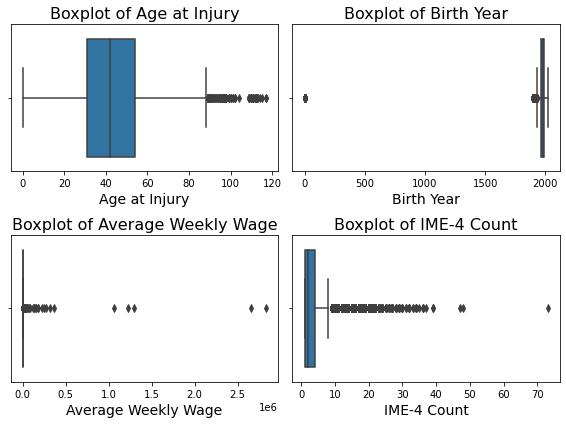

In [22]:
colunas = ['Age at Injury', 'Birth Year', 'Average Weekly Wage', 'IME-4 Count']
plt.figure(figsize=(8, 6))
for i, coluna in enumerate(colunas):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=coluna)
    plt.title(f'Boxplot of {coluna}', fontsize=16)
    plt.xlabel(coluna, fontsize=14)

plt.tight_layout()
plt.show()

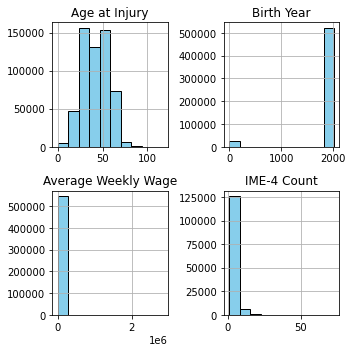

In [23]:
df[colunas].hist(bins=10, figsize=(5, 5), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## NA Data

In [24]:
percent_missing = df.isna().mean() * 100
percent_missing.sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622664
First Hearing Date                     74.590502
C-3 Date                               68.449174
Birth Year                              8.176137
Average Weekly Wage                     8.104187
Zip Code                                8.101828
WCIO Part Of Body Code                  6.154808
WCIO Part Of Body Description           6.154808
WCIO Nature of Injury Description       5.914695
WCIO Nature of Injury Code              5.914695
WCIO Cause of Injury Description        5.911831
WCIO Cause of Injury Code               5.911831
C-2 Date                                5.729850
Industry Code Description               4.954412
Industry Code                           4.954412
Accident Date                           3.898084
Accident Year                           3.898084
Age at Injury                           3.276487
District Name                           3.276487
Medical Fee Region  

# Correction of the age variable

> Adicionar blockquote



In [25]:
# Calculate Q1, Q3, and IQR for the column 'Age at Injury'
Q1 = df['Age at Injury'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Age at Injury'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outlier limits
lim_inferior = Q1 - 1.5 * IQR  # Lower limit for outliers
lim_superior = Q3 + 1.5 * IQR  # Upper limit for outliers

# Filter out the outliers
outliers = df[(df['Age at Injury'] < lim_inferior) | (df['Age at Injury'] > lim_superior)]
print(f"Outliers in the column 'Age at Injury':")  # Display message for outliers
print(min(outliers['Age at Injury']))  # Print the minimum value of the outliers

Outliers in the column 'Age at Injury':
89.0


In [26]:
# Define a valid age range for 'Age at Injury' (16 to 89 years)
df['Age at Injury'] = df['Age at Injury'].apply(lambda x: x if 14 <= x <= 89 else np.nan)

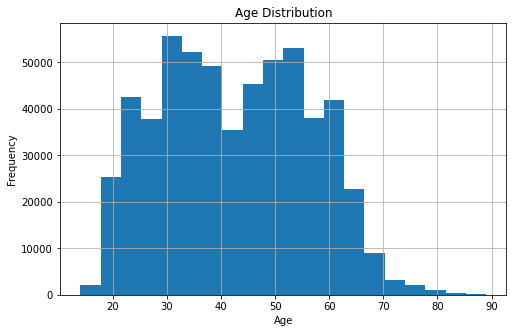

In [27]:
# Visualize the age distribution
df['Age at Injury'].hist(bins=20, figsize=(8, 5))  # Create a histogram of the 'Age at Injury' column
plt.title('Age Distribution')  # Set the title of the plot
plt.xlabel('Age')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the plot

## Correction of the Birth Year variable


In [28]:
Q1 = df['Birth Year'].quantile(0.25)
Q3 = df['Birth Year'].quantile(0.75)
IQR = Q3 - Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

outliers = df[(df['Birth Year'] < lim_inferior) | (df['Birth Year'] > lim_superior)]
print(f"Outliers in the column 'Birth Year':")
print(max(outliers['Birth Year']))

Outliers in the column 'Birth Year':
1928.0


In [29]:
df['Birth Year'] = df['Birth Year'].apply(lambda x: x if 1928 <= x else np.nan)

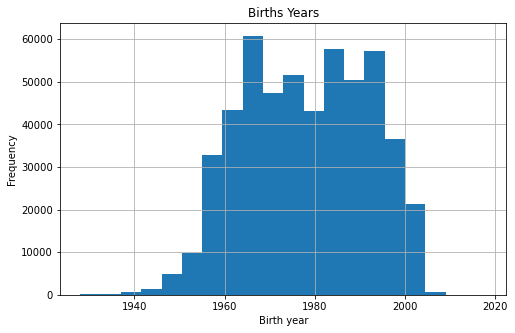

In [30]:
df['Birth Year'].hist(bins=20, figsize=(8, 5))
plt.title('Births Years')
plt.xlabel('Birth year')
plt.ylabel('Frequency')
plt.show()

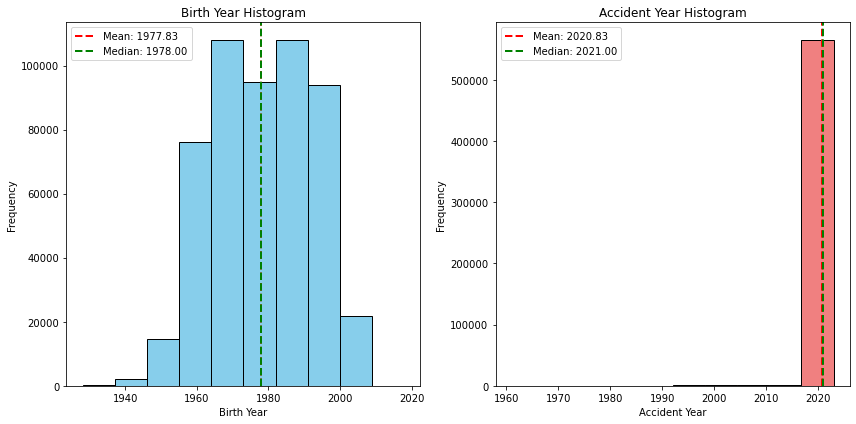

In [31]:
metric_features = ["Birth Year", "Accident Year"]
df_central = df.copy()
means = df_central[metric_features].mean()
medians = df_central[metric_features].median() # How do we get the median values of our data?
# Plotando os histogramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de Birth Year
axs[0].hist(df_central["Birth Year"].dropna(), bins=10, color='skyblue', edgecolor='black')
axs[0].axvline(means['Birth Year'], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {means['Birth Year']:.2f}")
axs[0].axvline(medians['Birth Year'], color='green', linestyle='dashed', linewidth=2, label=f"Median: {medians['Birth Year']:.2f}")
axs[0].set_title("Birth Year Histogram")
axs[0].set_xlabel("Birth Year")
axs[0].set_ylabel("Frequency")
axs[0].legend()

# Histograma de Accident Year
axs[1].hist(df_central["Accident Year"].dropna(), bins=10, color='lightcoral', edgecolor='black')
axs[1].axvline(means['Accident Year'], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {means['Accident Year']:.2f}")
axs[1].axvline(medians['Accident Year'], color='green', linestyle='dashed', linewidth=2, label=f"Median: {medians['Accident Year']:.2f}")
axs[1].set_title("Accident Year Histogram")
axs[1].set_xlabel("Accident Year")
axs[1].set_ylabel("Frequency")
axs[1].legend()

plt.tight_layout()
plt.show()

## Correction of the Average Weekly Wage variable 

In [32]:
# Average Weekly Wage -> The wage used to calculate workers’ compensation,
# disability, or an Paid Leave wage replacement benefits.

In [33]:
Q1 = df['Average Weekly Wage'].quantile(0.25)
Q3 = df['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1

lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

outliers = df[(df['Average Weekly Wage'] < lim_inferior) | (df['Average Weekly Wage'] > lim_superior)]
print(f"Outliers in the column 'Birth Year':")
print(outliers['Average Weekly Wage'])

Outliers in the column 'Birth Year':
27           2115.00
95           2615.80
176          2175.45
199          4371.78
209          2606.99
219          2125.69
250          2306.45
289          2363.00
310          2203.12
325          2488.39
333          2906.86
371          2147.90
375          3311.00
451          3350.69
476          2758.29
504          2599.55
515          2114.97
554          2560.59
595          2278.53
602          2455.09
623          2105.66
650          3055.75
678          2145.15
706          3213.06
743          2999.63
789          2610.61
857          2259.28
886          2323.94
929          2368.50
980          2254.82
1017         2847.22
1032         2256.67
1034         2123.22
1153         2432.38
1177         3224.31
1187         2527.76
1191         2142.04
1193         2940.42
1224         3037.50
1258         3087.46
1288         2570.52
1345         8488.33
1362         4704.67
1367         3049.69
1483         2890.13
1513         2692.

In [34]:
df = df[(df['Average Weekly Wage'] <= 2126.49)]

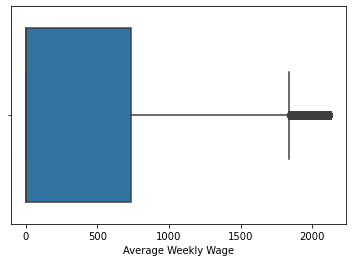

In [35]:
sns.boxplot(x=df['Average Weekly Wage'])
plt.show()

   ## Lets take a look at the WCIO Cause of Injury Description and Code

In [36]:
k=df['WCIO Cause of Injury Description'].unique().tolist()
for i in k:
    print(i,df[df['WCIO Cause of Injury Description']==i]['WCIO Cause of Injury Code'].unique().tolist())

FROM LIQUID OR GREASE SPILLS [27.0]
REPETITIVE MOTION [97.0, 94.0]
OBJECT BEING LIFTED OR HANDLED [79.0, 17.0, 66.0]
FALL, SLIP OR TRIP, NOC [31.0]
CUT, PUNCTURE, SCRAPE, NOC [19.0]
OTHER - MISCELLANEOUS, NOC [99.0]
STRUCK OR INJURED, NOC [81.0]
FALLING OR FLYING OBJECT [75.0]
CHEMICALS [1.0]
COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE [45.0]
LIFTING [56.0]
TWISTING [53.0]
ON SAME LEVEL [29.0]
STRAIN OR INJURY BY, NOC [60.0]
MOTOR VEHICLE, NOC [50.0]
FROM DIFFERENT LEVEL (ELEVATION) [25.0]
PUSHING OR PULLING [57.0]
FOREIGN MATTER (BODY) IN EYE(S) [87.0]
FELLOW WORKER, PATIENT OR OTHER PERSON [74.0]
STEAM OR HOT FLUIDS [5.0]
STATIONARY OBJECT [68.0]
HAND TOOL, UTENSIL; NOT POWERED [16.0]
ON ICE OR SNOW [32.0]
ABSORPTION, INGESTION OR INHALATION, NOC [82.0]
PERSON IN ACT OF A CRIME [89.0]
ON STAIRS [33.0]
FROM LADDER OR SCAFFOLDING [26.0]
SLIP, OR TRIP, DID NOT FALL [30.0]
JUMPING OR LEAPING [54.0]
MOTOR VEHICLE [77.0]
RUBBED OR ABRADED, NOC [95.0]
REACHING [58.0]
OBJECT HANDLED [12.0]
H

In [37]:
k=df['WCIO Cause of Injury Code'].unique().tolist()
for i in k:
    print(i,df[df['WCIO Cause of Injury Code']==i]['WCIO Cause of Injury Description'].unique().tolist())

27.0 ['FROM LIQUID OR GREASE SPILLS']
97.0 ['REPETITIVE MOTION']
79.0 ['OBJECT BEING LIFTED OR HANDLED']
31.0 ['FALL, SLIP OR TRIP, NOC']
19.0 ['CUT, PUNCTURE, SCRAPE, NOC']
99.0 ['OTHER - MISCELLANEOUS, NOC']
81.0 ['STRUCK OR INJURED, NOC']
75.0 ['FALLING OR FLYING OBJECT']
1.0 ['CHEMICALS']
45.0 ['COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE']
56.0 ['LIFTING']
53.0 ['TWISTING']
29.0 ['ON SAME LEVEL']
60.0 ['STRAIN OR INJURY BY, NOC']
50.0 ['MOTOR VEHICLE, NOC']
25.0 ['FROM DIFFERENT LEVEL (ELEVATION)']
57.0 ['PUSHING OR PULLING']
87.0 ['FOREIGN MATTER (BODY) IN EYE(S)']
74.0 ['FELLOW WORKER, PATIENT OR OTHER PERSON']
5.0 ['STEAM OR HOT FLUIDS']
68.0 ['STATIONARY OBJECT']
16.0 ['HAND TOOL, UTENSIL; NOT POWERED']
32.0 ['ON ICE OR SNOW']
82.0 ['ABSORPTION, INGESTION OR INHALATION, NOC']
89.0 ['PERSON IN ACT OF A CRIME']
17.0 ['OBJECT BEING LIFTED OR HANDLED']
33.0 ['ON STAIRS']
26.0 ['FROM LADDER OR SCAFFOLDING']
30.0 ['SLIP, OR TRIP, DID NOT FALL']
54.0 ['JUMPING OR LEAPING']
66.0 ['OBJ

In [38]:
print(df[df['WCIO Cause of Injury Description']=='OBJECT BEING LIFTED OR HANDLED']['WCIO Cause of Injury Code'].unique())
print(df[df['WCIO Cause of Injury Description']=='REPETITIVE MOTION']['WCIO Cause of Injury Code'].unique())

[79. 17. 66.]
[97. 94.]


In [39]:
df.loc[df['WCIO Cause of Injury Description'] == 'OBJECT BEING LIFTED OR HANDLED', 'WCIO Cause of Injury Code'] = 79.0

In [40]:
df.loc[df['WCIO Cause of Injury Description'] == 'REPETITIVE MOTION', 'WCIO Cause of Injury Code'] = 97.0

## Lets take a look at the WCIO Nature of Injury Description and Code

In [41]:
k=df['WCIO Nature of Injury Description'].unique().tolist()
for i in k:
    print(df[df['WCIO Nature of Injury Description']==i]['WCIO Nature of Injury Code'].unique().tolist())

[10.0]
[49.0]
[7.0]
[40.0]
[71.0]
[59.0]
[37.0]
[4.0]
[52.0]
[28.0]
[25.0]
[46.0]
[90.0]
[16.0]
[80.0]
[34.0]
[43.0]
[3.0]
[1.0]
[]
[36.0]
[13.0]
[53.0]
[42.0]
[78.0]
[65.0]
[31.0]
[77.0]
[47.0]
[19.0]
[72.0]
[60.0]
[68.0]
[69.0]
[73.0]
[2.0]
[41.0]
[54.0]
[66.0]
[58.0]
[91.0]
[55.0]
[74.0]
[32.0]
[75.0]
[22.0]
[61.0]
[67.0]
[83.0]
[76.0]
[30.0]
[62.0]
[64.0]
[38.0]
[79.0]
[70.0]
[63.0]


## Lets take a look at the WCIO part of body Description and Code

In [42]:
k=df['WCIO Part Of Body Description'].unique().tolist()
for i in k:
    print(i,df[df['WCIO Part Of Body Description']==i]['WCIO Part Of Body Code'].unique().tolist())

BUTTOCKS [62.0]
SHOULDER(S) [38.0]
MULTIPLE HEAD INJURY [10.0]
FINGER(S) [36.0]
LUNGS [60.0]
EYE(S) [14.0]
ANKLE [55.0]
KNEE [53.0]
THUMB [37.0]
LOWER BACK AREA [42.0]
ABDOMEN INCLUDING GROIN [61.0]
LOWER LEG [54.0]
HIP [51.0]
UPPER LEG [52.0]
MOUTH [17.0]
WRIST [34.0]
SPINAL CORD [23.0, 47.0]
HAND [35.0]
SOFT TISSUE [18.0, 25.0]
UPPER ARM [31.0]
FOOT [56.0]
ELBOW [32.0]
MULTIPLE UPPER EXTREMITIES [30.0]
MULTIPLE BODY PARTS (INCLUDING BODY [90.0]
BODY SYSTEMS AND MULTIPLE BODY SYSTEMS [91.0]
MULTIPLE NECK INJURY [20.0]
CHEST [44.0]
WRIST (S) & HAND(S) [39.0]
EAR(S) [13.0]
MULTIPLE LOWER EXTREMITIES [50.0]
LOWER ARM [33.0]
MULTIPLE [-9.0]
DISC [22.0, 43.0]
UPPER BACK AREA [41.0]
SKULL [11.0]
TOES [57.0]
FACIAL BONES [19.0]
nan []
TEETH [16.0]
NO PHYSICAL INJURY [66.0]
MULTIPLE TRUNK [40.0]
WHOLE BODY [99.0]
INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED [65.0]
PELVIS [46.0]
NOSE [15.0]
GREAT TOE [58.0]
INTERNAL ORGANS [48.0]
HEART [49.0]
VERTEBRAE [21.0]
LUMBAR & OR SACRAL VERTEB

In [43]:
k=df['WCIO Part Of Body Code'].unique().tolist()
for i in k:
    print(i,df[df['WCIO Part Of Body Code']==i]['WCIO Part Of Body Description'].unique().tolist())

62.0 ['BUTTOCKS']
38.0 ['SHOULDER(S)']
10.0 ['MULTIPLE HEAD INJURY']
36.0 ['FINGER(S)']
60.0 ['LUNGS']
14.0 ['EYE(S)']
55.0 ['ANKLE']
53.0 ['KNEE']
37.0 ['THUMB']
42.0 ['LOWER BACK AREA']
61.0 ['ABDOMEN INCLUDING GROIN']
54.0 ['LOWER LEG']
51.0 ['HIP']
52.0 ['UPPER LEG']
17.0 ['MOUTH']
34.0 ['WRIST']
23.0 ['SPINAL CORD']
35.0 ['HAND']
18.0 ['SOFT TISSUE']
31.0 ['UPPER ARM']
25.0 ['SOFT TISSUE']
56.0 ['FOOT']
32.0 ['ELBOW']
30.0 ['MULTIPLE UPPER EXTREMITIES']
90.0 ['MULTIPLE BODY PARTS (INCLUDING BODY']
91.0 ['BODY SYSTEMS AND MULTIPLE BODY SYSTEMS']
20.0 ['MULTIPLE NECK INJURY']
44.0 ['CHEST']
39.0 ['WRIST (S) & HAND(S)']
13.0 ['EAR(S)']
50.0 ['MULTIPLE LOWER EXTREMITIES']
33.0 ['LOWER ARM']
-9.0 ['MULTIPLE']
22.0 ['DISC']
41.0 ['UPPER BACK AREA']
11.0 ['SKULL']
57.0 ['TOES']
19.0 ['FACIAL BONES']
nan []
16.0 ['TEETH']
66.0 ['NO PHYSICAL INJURY']
40.0 ['MULTIPLE TRUNK']
99.0 ['WHOLE BODY']
65.0 ['INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED']
46.0 ['PELVIS']
15.0 ['NOSE']
58.0

Spinal Cord-23,47
Soft Tissue-18,25
Disc-22,43

In [44]:
df.loc[df['WCIO Part Of Body Description'] == 'Spinal Cord', 'WCIO Part Of Body Code'] = 23.0

In [45]:
df.loc[df['WCIO Part Of Body Description'] == 'Soft Tissue', 'WCIO Part Of Body Code'] = 23.0

In [46]:
df.loc[df['WCIO Part Of Body Description'] == 'Disc', 'WCIO Part Of Body Code'] = 23.0